## 1. happy_0814 데이터 가져오기 

In [58]:
import pandas as pd
df = pd.read_csv('Project/pdata/happy_0814.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1881 entries, 0 to 1880
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      1881 non-null   object 
 1   year         1881 non-null   int64  
 2   HS           1881 non-null   float64
 3   log_gdp      1881 non-null   float64
 4   social       1881 non-null   float64
 5   life_exp     1881 non-null   float64
 6   freedom      1881 non-null   float64
 7   generosity   1881 non-null   float64
 8   corruption   1881 non-null   float64
 9   schooling    1881 non-null   float64
 10  alcohol      1881 non-null   float64
 11  suicide      1881 non-null   float64
 12  obesity      1881 non-null   float64
 13  birth        1881 non-null   float64
 14  mental       1881 non-null   float64
 15  country_num  1881 non-null   int64  
 16  continent    1881 non-null   object 
dtypes: float64(13), int64(2), object(2)
memory usage: 249.9+ KB


#### country, year, country_num, continent 변수 범주화

In [59]:
df['country']= df['country'].astype("category")
df['year']= df['year'].astype("category")
df['country_num']= df['country_num'].astype("category")
df['continent']= df['continent'].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1881 entries, 0 to 1880
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   country      1881 non-null   category
 1   year         1881 non-null   category
 2   HS           1881 non-null   float64 
 3   log_gdp      1881 non-null   float64 
 4   social       1881 non-null   float64 
 5   life_exp     1881 non-null   float64 
 6   freedom      1881 non-null   float64 
 7   generosity   1881 non-null   float64 
 8   corruption   1881 non-null   float64 
 9   schooling    1881 non-null   float64 
 10  alcohol      1881 non-null   float64 
 11  suicide      1881 non-null   float64 
 12  obesity      1881 non-null   float64 
 13  birth        1881 non-null   float64 
 14  mental       1881 non-null   float64 
 15  country_num  1881 non-null   category
 16  continent    1881 non-null   category
dtypes: category(4), float64(13)
memory usage: 213.6 KB


## 2. 데이터 minmax 정규화 

In [60]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
x= df[['log_gdp', 'social', 'life_exp', 'freedom','generosity', 'corruption', 
       'schooling', 'alcohol', 'suicide','obesity', 'birth', 'mental']]
xnor = MinMaxScaler().fit_transform(x)
xnor

array([[0.14661879, 0.23098996, 0.41294643, ..., 0.19612591, 0.81355154,
        0.13423383],
       [0.18053062, 0.3758967 , 0.421875  , ..., 0.21468927, 0.78403181,
        0.14384547],
       [0.20187512, 0.35724534, 0.43080357, ..., 0.22962066, 0.75298256,
        0.15576559],
       ...,
       [0.28206663, 0.69583931, 0.52008929, ..., 0.15940274, 0.39171   ,
        0.15606046],
       [0.26231797, 0.67288379, 0.53348214, ..., 0.15940274, 0.37886204,
        0.15606046],
       [0.23818073, 0.61262554, 0.546875  , ..., 0.15940274, 0.36800245,
        0.15606046]])

In [61]:
dfnor = pd.DataFrame(xnor)
dfnor.columns = ['log_gdp', 'social', 'life_exp', 'freedom', 'generosity', 'corruption', 'schooling', 'alcohol',
                     'suicide','obesity', 'birth', 'mental']

# 정규화 안한 컬럼 dfnor에 추가
dfnor[['HS','year','country','country_num','continent']]= df[['HS','year','country','country_num','continent']]
dfnor

,log_gdp,social,life_exp,freedom,generosity,corruption,schooling,alcohol,suicide,obesity,birth,mental,HS,year,country,country_num,continent
0,0.146619,0.230990,0.412946,0.632737,0.486931,0.893460,0.132812,0.023349,0.055732,0.196126,0.813552,0.134234,3.724,2008,Afghanistan,4,AS
1,0.180531,0.375897,0.421875,0.579092,0.508228,0.859705,0.140625,0.022616,0.058095,0.214689,0.784032,0.143845,4.402,2009,Afghanistan,4,AS
2,0.201875,0.357245,0.430804,0.470426,0.441433,0.708861,0.148438,0.022087,0.061509,0.229621,0.752983,0.155766,4.758,2010,Afghanistan,4,AS
3,0.196489,0.331420,0.437946,0.327373,0.481123,0.734177,0.156250,0.021458,0.064580,0.240517,0.721322,0.166215,3.832,2011,Afghanistan,4,AS
4,0.213445,0.331420,0.445089,0.375516,0.552759,0.781646,0.164062,0.020844,0.066509,0.248991,0.689507,0.174200,3.783,2012,Afghanistan,4,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,0.269100,0.685796,0.493304,0.653370,0.232333,0.726793,0.539062,0.029011,0.304615,0.148507,0.420618,0.144364,3.735,2016,Zimbabwe,716,AF
1877,0.275484,0.665710,0.506696,0.680880,0.229429,0.755274,0.539062,0.028272,0.316034,0.159403,0.405782,0.156060,3.638,2017,Zimbabwe,716,AF
1878,0.282067,0.695839,0.520089,0.694635,0.258470,0.853376,0.539062,0.028272,0.316034,0.159403,0.391710,0.156060,3.616,2018,Zimbabwe,716,AF
1879,0.262318,0.672884,0.533482,0.514443,0.262343,0.839662,0.539062,0.028272,0.316034,0.159403,0.378862,0.156060,2.694,2019,Zimbabwe,716,AF


## 3. dfnor 행 랜덤으로 재배치 + 인덱스 재정렬 후 ndf에 저장 

In [62]:
ndf=dfnor.sample(frac=1).reset_index(drop=True)
ndf

,log_gdp,social,life_exp,freedom,generosity,corruption,schooling,alcohol,suicide,obesity,birth,mental,HS,year,country,country_num,continent
0,0.016756,0.001435,0.373214,0.002751,0.305905,0.870253,0.093750,0.091795,0.071552,0.005650,0.810340,0.100939,3.563,2008,Burundi,108,AF
1,0.480551,0.562410,0.725446,0.360385,0.100678,0.859705,0.750000,0.074570,0.103019,0.497579,0.097277,0.334266,4.289,2006,Armenia,51,AS
2,0.606822,0.802009,0.738594,0.669876,0.284608,0.922996,0.648438,0.018870,0.120259,0.648507,0.067605,0.346498,5.240,2018,North Macedonia,807,EU
3,0.476760,0.723099,0.741071,0.745530,0.145208,0.803797,0.437500,0.613262,0.196388,0.486279,0.156776,0.381181,6.140,2016,El Salvador,222,Nor.A
4,0.059844,0.292683,0.517857,0.746905,0.380445,0.843882,0.242188,0.096745,0.096165,0.064568,0.531202,0.141123,3.868,2015,Malawi,454,AF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,0.051865,0.463415,0.426786,0.653370,0.420136,0.862869,0.234375,0.098272,0.067640,0.039548,0.628174,0.087319,3.946,2011,Malawi,454,AF
1877,0.548374,0.865136,0.745536,0.767538,0.275895,0.822785,0.476562,0.002586,0.174085,0.348668,0.143469,0.417085,6.408,2010,Colombia,170,SA
1878,0.176541,0.651363,0.412500,0.500688,0.256534,0.728903,0.007812,0.092995,0.071714,0.048830,0.709544,0.080044,3.955,2012,Burkina Faso,854,AF
1879,0.756034,0.928264,0.887946,0.460798,0.490803,0.936709,0.882812,0.019039,0.175526,0.372074,0.292291,0.659249,7.353,2009,Israel,376,AS


## 4. ndf 데이터 회귀식 적합

#### 4-1. model1 (변수변환 x)

In [63]:
from statsmodels.formula.api import ols
model1 = ols("HS~ country + log_gdp + social + life_exp + freedom + generosity + corruption + schooling+ alcohol+ suicide + obesity+ birth+ mental", data=ndf).fit()
model1.summary()

# R-squared:	0.910 , Adj. R-squared:	0.901 , Durbin-Watson:	2.010

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HS   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     105.2
Date:                Fri, 13 Aug 2021   Prob (F-statistic):               0.00
Time:                        18:16:49   Log-Likelihood:                -626.39
No. Observations:                1881   AIC:                             1583.
Df Residuals:                    1716   BIC:                             2497.
Df Model:                         164                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               2.5795      0.391      6.604      0.000       1.813       3.346
country[T.Albania]                      0.2638      0.258      1.021      0.307      -0.243       0.771
country[T.Algeria]                      0.5795      0.242      2.392      0.017       0.104       1.055
country[T.Angola]                      -1.1705      0.270     -4.341      0.000      -1.699      -0.642
country[T.Argentina]                    0.3375      0.288      1.171      0.242      -0.228       0.903
country[T.Armenia]                      0.0707      0.279      0.254      0.800      -0.476       0.617
country[T.Australia]                    0.1692      0.394      0.429      0.668      -0.604       0.943
country[T.Austria]                      0.1628      0.369      0.441      0.659      -0.562       0.887
country[T.Azerbaijan]                   0.0261      0.272      0.096      0.924      -0.508       0.560
country[T.Bahrain]                     -0.6226      0.374     -1.666      0.096      -1.356       0.111
country[T.Bangladesh]                   0.6508      0.236      2.755      0.006       0.187       1.114
country[T.Belarus]                      0.6200      0.407      1.523      0.128      -0.178       1.418
country[T.Belgium]                     -0.1088      0.382     -0.285      0.776      -0.859       0.641
country[T.Belize]                       1.5408      0.341      4.523      0.000       0.873       2.209
country[T.Benin]                       -0.3254      0.170     -1.919      0.055      -0.658       0.007
country[T.Bhutan]                      -0.6197      0.335     -1.850      0.064      -1.277       0.037
country[T.Bolivia]                      0.7811      0.222      3.517      0.000       0.345       1.217
country[T.Bosnia and Herzegovina]       0.5355      0.276      1.939      0.053      -0.006       1.077
country[T.Botswana]                    -2.1043      0.290     -7.252      0.000      -2.673      -1.535
country[T.Brazil]                       1.1151      0.267      4.176      0.000       0.591       1.639
country[T.Bulgaria]                    -0.6804      0.319     -2.132      0.033      -1.306      -0.054
country[T.Burkina Faso]                -0.1248      0.171     -0.729      0.466      -0.461       0.211
country[T.Burundi]                      0.7780      0.224      3.476      0.001       0.339       1.217
country[T.Cambodia]                    -0.2438      0.226     -1.081      0.280      -0.686       0.199
country[T.Cameroon]                    -0.0104      0.183     -0.057      0.955      -0.369       0.348
country[T.Canada]                       0.3491      0.374      0.934      0.350      -0.384       1.082
country[T.Central African Republic]     0.3262      0.219      1.49

#### 4-2. model2 : 종속변수(HS) boxcox 변환 

In [64]:
# boxcox 변환후 적합 (lambda =2로 계산)
import numpy as np
model2 = ols("np.square(HS)~  C(country)+ log_gdp + social+ life_exp + freedom+ generosity+ corruption+ schooling+ alcohol+ suicide+ obesity+ birth+ mental", data=ndf).fit()
model2.summary()

# R-squared:	0.923, Adj. R-squared:	0.916, Durbin-Watson:	2.007

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.square(HS)   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     125.3
Date:                Fri, 13 Aug 2021   Prob (F-statistic):               0.00
Time:                        18:16:49   Log-Likelihood:                -5003.4
No. Observations:                1881   AIC:                         1.034e+04
Df Residuals:                    1716   BIC:                         1.125e+04
Df Model:                         164                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  3.8209      4.002      0.955      0.340      -4.029      11.671
C(country)[T.Albania]                     -0.2323      2.648     -0.088      0.930      -5.426       4.961
C(country)[T.Algeria]                      3.6627      2.482      1.475      0.140      -1.206       8.531
C(country)[T.Angola]                     -14.1848      2.763     -5.134      0.000     -19.604      -8.766
C(country)[T.Argentina]                    2.1454      2.953      0.726      0.468      -3.647       7.938
C(country)[T.Armenia]                     -1.5153      2.855     -0.531      0.596      -7.114       4.084
C(country)[T.Australia]                    3.7333      4.041      0.924      0.356      -4.193      11.660
C(country)[T.Austria]                      2.9948      3.785      0.791      0.429      -4.429      10.419
C(country)[T.Azerbaijan]                  -2.3324      2.790     -0.836      0.403      -7.806       3.141
C(country)[T.Bahrain]                     -7.7592      3.830     -2.026      0.043     -15.271      -0.247
C(country)[T.Bangladesh]                   3.5253      2.420      1.456      0.145      -1.222       8.273
C(country)[T.Belarus]                      4.9756      4.170      1.193      0.233      -3.204      13.155
C(country)[T.Belgium]                     -0.8825      3.918     -0.225      0.822      -8.566       6.801
C(country)[T.Belize]                      14.9750      3.491      4.290      0.000       8.128      21.822
C(country)[T.Benin]                       -4.6452      1.737     -2.674      0.008      -8.053      -1.238
C(country)[T.Bhutan]                      -9.8863      3.433     -2.880      0.004     -16.619      -3.154
C(country)[T.Bolivia]                      5.8552      2.276      2.573      0.010       1.391      10.319
C(country)[T.Bosnia and Herzegovina]       2.3909      2.830      0.845      0.398      -3.160       7.942
C(country)[T.Botswana]                   -22.7712      2.973     -7.658      0.000     -28.603     -16.939
C(country)[T.Brazil]                      10.9534      2.736      4.003      0.000       5.587      16.320
C(country)[T.Bulgaria]                    -9.2491      3.271     -2.828      0.005     -15.664      -2.834
C(country)[T.Burkina Faso]                -3.1190      1.754     -1.778      0.076      -6.559       0.321
C(country)[T.Burundi]                      7.8382      2.293      3.418      0.001       3.341      12.336
C(country)[T.Cambodia]                    -4.8470      2.311     -2.097      0.036      -9.380      -0.314
C(country)[T.Cameroon]                    -2.2065      1.871     -1.179      0.238      -5.876       1.463
C(country)[T.Canada]                       5.7194      3.829      1.494      0.135     

## 5. 회귀진단

#### 5-1. model1 진단 

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


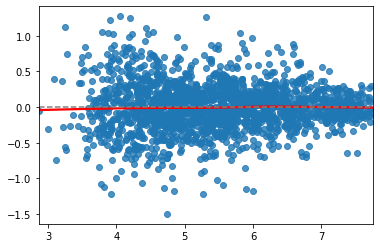

In [65]:
# # 1. 모형의 선형성
# 예측값(fitted)와 잔차(residual)을 비교
# 빨간 실선은 잔차의 추세를 나타낸다
# 빨간 실선이 점선에서 크게 벗어나면 예측값에 따라 잔차가 크게 달라진것으로 선형성이 없다는 것
import matplotlib.pyplot as plt
import seaborn as sns

fitted= model1.predict(ndf)
residual= ndf['HS'] - fitted
sns.regplot(fitted, residual, lowess=True, line_kws={'color':'red'})
plt.plot([fitted.min(),fitted.max()], [0,0], '--', color='grey')

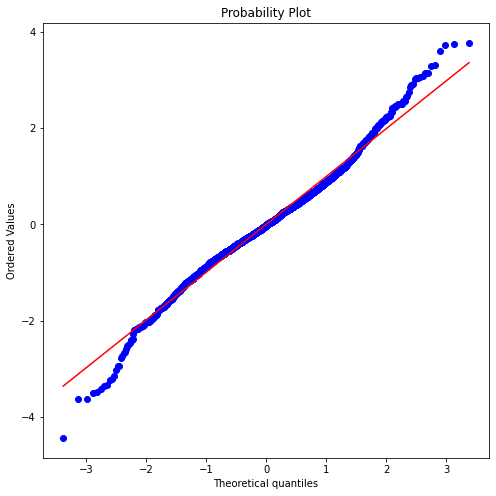

In [66]:
# 2. 잔차의 정규성
# 잔차가 정규분포를 따른다는 가정을 한다
# QQ Plot로 확인할 수 있다.
# 잔차가 정규분포를 띄면 QQ plot에서 점들이 점선을 따라 배치되어 있어야 한다
import scipy.stats
from scipy.stats import probplot 
sr = scipy.stats.zscore(residual)
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()
probplot(sr, dist='norm',plot=ax) ## qq plot 출력
plt.show()

In [67]:
scipy.stats.shapiro(residual)

ShapiroResult(statistic=0.9865595698356628, pvalue=2.8737637269848904e-12)

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

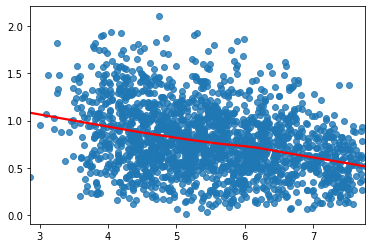

In [68]:
# 3. 잔차의 등분산성
# 희귀모형을 통해 예측된 값이 어떻든지, 모든 값들에 대하여 잔차의 분산이 동일하다는 가정
# 예측값(X축)에 따라 잔차가 어떻게 달라지는지 보여줌
# 빨간색 실선이 수평선에 가까울수록 등분산성이 있다는 것
import numpy as np
sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color':'red'})

#### 5-2. model2 진단

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


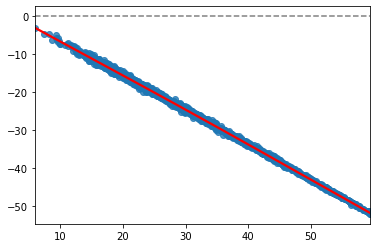

In [69]:
# # 1. 모형의 선형성
# 예측값(fitted)와 잔차(residual)을 비교
# 빨간 실선은 잔차의 추세를 나타낸다
# 빨간 실선이 점선에서 크게 벗어나면 예측값에 따라 잔차가 크게 달라진것으로 선형성이 없다는 것
import matplotlib.pyplot as plt
import seaborn as sns

fitted= model2.predict(ndf)
residual= ndf['HS'] - fitted
sns.regplot(fitted, residual, lowess=True, line_kws={'color':'red'})
plt.plot([fitted.min(),fitted.max()], [0,0], '--', color='grey')

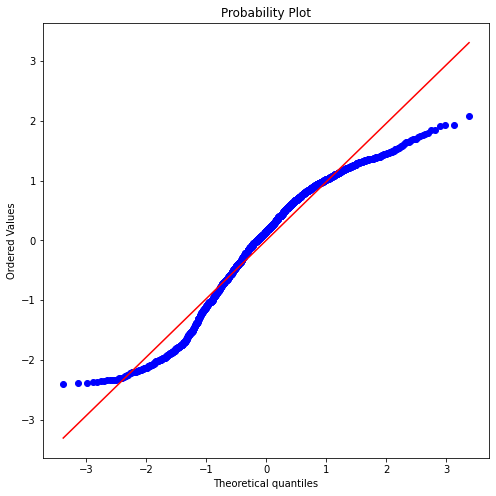

In [70]:
# 2. 잔차의 정규성
# 잔차가 정규분포를 따른다는 가정을 한다
# QQ Plot로 확인할 수 있다.
# 잔차가 정규분포를 띄면 QQ plot에서 점들이 점선을 따라 배치되어 있어야 한다
import scipy.stats
from scipy.stats import probplot 
sr = scipy.stats.zscore(residual)
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()
probplot(sr, dist='norm',plot=ax) ## qq plot 출력
plt.show()

In [71]:
scipy.stats.shapiro(residual)

ShapiroResult(statistic=0.9568841457366943, pvalue=3.6319310693112807e-23)

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

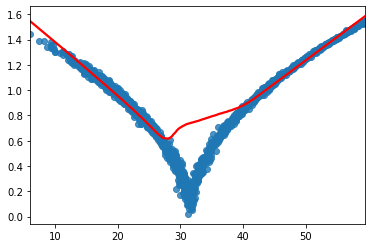

In [72]:
# 3. 잔차의 등분산성
# 희귀모형을 통해 예측된 값이 어떻든지, 모든 값들에 대하여 잔차의 분산이 동일하다는 가정
# 예측값(X축)에 따라 잔차가 어떻게 달라지는지 보여줌
# 빨간색 실선이 수평선에 가까울수록 등분산성이 있다는 것
import numpy as np
sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color':'red'})

## 6. 결론
#### - model1(변수변환 x) 
######  모델의 선형성, 잔차의 독립성 만족 / 잔차의 정규성, 잔차의 등분산성 만족 실패
######  R-squared:	0.910 , Adj. R-squared:	0.901 , Durbin-Watson:	2.010
#### 
#### - model2(HS^2 로 변환) 
######  모델의 선형성 만족 / 잔차의 독립성, 잔차의 정규성, 잔차의 등분산성 만족 실패
######   R-squared:	0.923, Adj. R-squared:	0.916, Durbin-Watson:	2.007
#### 
### r-squared 값은 model2가 더 높지만 model1과의 차이가 0.013으로 크지 않고, 
### 가정이 두 개나 만족 되므로 model1을 사용하는 것이 더 나을 것 같다! 